<a href="https://colab.research.google.com/github/DataTak/study_deeplearning_fromscratch/blob/main/4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chatper4. 신경망 학습

## 손실함수


MSE<br>
회귀 문제에서 주로 사용되며, 예측 값과 실제 값의 차이를 제곱하여 평균을 구합니다.

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$


In [1]:
## MSE(Mean Squared Error)
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.06, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [3]:
mean_squared_error(np.array(y), np.array(t))

0.09805000000000003

In [4]:
y1 = [0.1, 0.05, 0.06, 0.0, 0.06, 0.6, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y1), np.array(t))

0.6348499999999999

- 손실함수 (MSE) 출력 값이 작으면 정답 레이블과의 오차도 작다.

---


- 교차 엔트로피 손실 (Cross-Entropy Loss)
분류 문제에서 주로 사용되며, 예측 확률과 실제 클래스 확률의 차이를 정보 손실의 관점에서 측정합니다.

$$
\text{Cross-Entropy} = -\sum_{i=1}^{N} y_i \log(\hat{y}_i)
$$

- 요약 비교

| **손실 함수**         | **사용 주제**  | **주된 목적**                  | **계산 방식**             |
|----------------------|----------------|--------------------------------|---------------------------|
| 평균제곱오차(MSE)     | 회귀 문제      | 예측 값과 실제 값 차이 최소화    | 예측 오차의 제곱 평균      |
| 교차 엔트로피        | 분류 문제      | 올바른 클래스 확률 극대화       | -로그 확률 값의 합         |


In [5]:
# CEE(Cross Entryopy Error)

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7                         # delta를 더하는 이유는 log() 함수에 0이 입력되면 -inf 출력되어 계산 불가. 무한대 방지를 위하여 활용
    return -np.sum(t*np.log(y+delta))

In [7]:
y = [0.1, 0.05, 0.6, 0.0, 0.06, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [8]:
y1 = [0.1, 0.05, 0.06, 0.0, 0.06, 0.6, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y1), np.array(t))

2.8134090500947586

## 미니배치학습
- 모든 데이터를 다 넣어서 손실함수를 구하는 것이 아니라 일부 데이터를 가지고 와서 학습을 수행. 이 일부를 미니배치라고 함.
- 계산효율성, 일반화 가능성 등 다양한 장점으로 미니배치 활용

In [9]:
# 저자 깃 저장소 클론
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 853, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 853 (delta 9), reused 13 (delta 5), pack-reused 830 (from 1)
Receiving objects: 100% (853/853), 52.33 MiB | 16.36 MiB/s, done.
Resolving deltas: 100% (486/486), done.


In [10]:
import sys, os
sys.path.append("/content/deep-learning-from-scratch")  #불러온 깃 저장소를
from dataset.mnist import load_mnist

In [11]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [12]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [13]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [14]:
batch_mask

array([ 1882, 30238, 31341, 31829, 11406, 11247, 51472, 43057, 13132,
       35319])

In [15]:
#미니배치용 CEE
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

- 손실함수를 설정하는 이유
    - 신경망을 학습할 때 정확도를 지표로 삼으면 매개변수의 미분이 대부분의 장소에서 0이된다.
        - 정확도는 매개변수의 변화에 거의 반응을 보이지 않고, 반응이 있더라도 불연속적으로 변화(계단함수 같다고 생각하면 쉬움.)
- <GPT 활용 손실함수 사용 이유 답변>
1. 정확도는 연속적인 피드백을 제공하지 않습니다.
- 정확도는 예측이 정확한지 아닌지만 판단하기 때문에 모델이 어디에서 얼마나 틀렸는지를 알려주지 않습니다. - 예를 들어, 예측이 실제 값과 조금 벗어난 경우에도 정확도는 틀렸다고 표시하지만, 손실 함수는 이 차이를 구체적으로 계산해줍니다.
- 모델이 학습하는 동안 얼마나 개선되고 있는지를 세부적으로 파악하기 위해서는 차이를 연속적인 값으로 표시하는 손실 함수가 필요합니다.
2. 손실 함수는 미분 가능한 수치 피드백을 제공합니다.
- 딥러닝 모델을 훈련할 때는 경사하강법을 통해 가중치를 업데이트합니다. 경사하강법은 손실 함수의 **기울기(미분)**를 사용하여 손실을 최소화하는 방향으로 가중치를 조정합니다.
- 정확도는 불연속적인 값이므로 미분이 불가능하여, 이를 기준으로 경사하강법을 사용할 수 없습니다. 반면 손실 함수는 미분 가능하므로, 학습 과정에서 손실을 최소화하는 방향으로 모델을 최적화할 수 있습니다.
3. 손실 함수는 세부적인 성능 차이를 학습에 반영할 수 있습니다.
- 손실 함수는 예측값과 실제값 간의 차이를 연속적인 값으로 표현하기 때문에, 예측의 오차 크기와 방향을 모델에 피드백으로 제공할 수 있습니다.
- 특히 회귀 문제에서 평균제곱오차(MSE)와 같은 손실 함수는 예측값이 실제값과 얼마나 가까운지를 나타내어, 모델이 세밀하게 개선될 수 있도록 돕습니다.
- 분류 문제에서도 교차 엔트로피 손실을 통해 모델이 정확한 클래스의 확률을 더 높게 예측하도록 유도할 수 있습니다.



## 수치미분

In [16]:
#수치 미분 계산 함수
def numerical_diff(f, x):
    h = 1e-4  #h값을 너무 작게 하면 반올림오차의 문제가 만들어진다(0으로 처리)
    return (f(x+h) - f(x-h)) / (2*h)

In [17]:
#기울기
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)   #x와 형상이 같은 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val
    return grad

## 경사하강법 (Gradient Descent) _ GPT활용

경사하강법은 함수의 기울기를 이용하여 **최소값**을 찾아가는 최적화 알고리즘입니다. 예를 들어, 다음과 같은 함수가 있다고 가정해보겠습니다.

$$
y = x_0^2 + x_1^2
$$

이 함수의 최소값을 찾기 위해 각 변수 \( x_0 \)와 \( x_1 \)에 대한 **편미분**을 계산하여, 기울기가 가리키는 반대 방향으로 이동하며 \( y \) 값을 점차 줄입니다.

### 1. 기울기 계산
먼저, \( y \)를 \( x_0 \)와 \( x_1 \)에 대해 편미분하여 기울기를 구합니다.

$$
\frac{\partial y}{\partial x_0} = 2x_0
$$

$$
\frac{\partial y}{\partial x_1} = 2x_1
$$

따라서, 기울기 벡터는 다음과 같이 표현됩니다.

$$
\nabla y = \begin{bmatrix} 2x_0 \\ 2x_1 \end{bmatrix}
$$

### 2. 기울기를 이용한 변수 업데이트
경사하강법에서는 기울기 벡터의 반대 방향으로 이동하면서 변수를 업데이트합니다. 학습률(learning rate)을 \( \eta \)라고 할 때, 경사하강법에 따라 변수 \( x_0 \)와 \( x_1 \)는 다음과 같이 업데이트됩니다.

$$
x_0 = x_0 - \eta \cdot \frac{\partial y}{\partial x_0} = x_0 - \eta \cdot 2x_0
$$

$$
x_1 = x_1 - \eta \cdot \frac{\partial y}{\partial x_1} = x_1 - \eta \cdot 2x_1
$$

### 3. 반복 수행
이 과정을 반복하면 \( x_0 \)와 \( x_1 \) 값이 점차적으로 함수 \( y \)의 최소값을 향해 이동하게 됩니다. 학습률 \( \eta \)의 값이 적절히 조절되면, 경사하강법은 수렴하여 최소값에 도달하게 됩니다.


In [18]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):  #f: 함수 / init_x: 초깃값, lr: 학습률, step_num: 반복횟수)
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [19]:
#경사하강법으로 f(x0, x1) = x0^2 + x1^2 의 최솟값 구하기
def function_2(x):
    return x[0]**2 + x[1]**2

In [20]:
init_x = np.array([-3.0, 4.0])

In [21]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

- lr의 수치에 따라서 너무 크면 발산 / 작으면 거의 갱신이 되지 않음.
- lr과 같은 매개변수를 하이퍼파라미터(hyper parameter)라고 함.
    - 사람이 직접 설정해야 하는 매개변수.

## 신경망 기울기 구하기

In [22]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [23]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss


In [25]:
net = simpleNet()
print(net.W)

[[-0.68496159 -0.34648499  1.25277233]
 [ 0.99134541 -0.10017676 -2.84606048]]


In [26]:
x = np.array([0.6, 0.9])
p = net.predict(x)

In [27]:
p

array([ 0.48123392, -0.29805008, -1.80979104])

In [28]:
t = np.array([0,0,1])
net.loss(x, t)

2.7356432549397143

In [30]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
dW

array([[ 0.38464017,  0.17644766, -0.56108783],
       [ 0.57696026,  0.26467149, -0.84163174]])

---
- 신경망 학습 이루어지는 순서
 - 전제: 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 한다.
 1. 미니배치: 훈련 데이터 중 일부를 무작위로 가지고 오기. 이렇게 선별한 데이터를 미니배치라고 하며 미니 배치의 손실 함수 값을 줄이는 것이 목표
 2. 기울기 산출: 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게하는 방향을 제시한다.
 3. 매개변수 갱신: 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
 4. 반복: 1~4단계 반복

- 확률적 경사 하강법(stochastic gradient descent, SGD). 미니배치로 무작위로 데이터를 선정하기 때문에 확률적 이라고 붙여준다.

## 2층 신경망 클래스 구현하기

In [31]:
from common.functions import *
from common.gradient import numerical_gradient

In [32]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']

        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [33]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size = 10)


(784, 100)

In [34]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [38]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)


- 위 코드로 학습하는데 3분 이상 걸림
- 수치 미분 방식으로 계산하면 연산 속도가 느린데, 오차역전파를 이용하면 빠르게 계산 가능.

In [39]:
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 미니배치 학습 구현하기

In [42]:
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

In [46]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []

#하이퍼파라미터
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

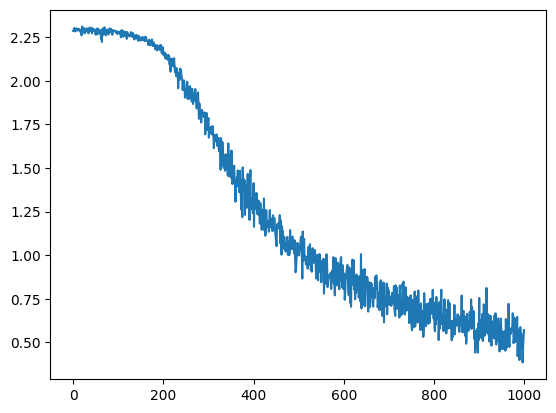

In [49]:
import matplotlib.pyplot as plt

plt.plot(train_loss_list)

- 1에폭별 훈련데이터, 시험데이터 정확도 기록하기(훈련데이터에만 적합한 오버피팅 모델이 되지 않도록 확인)
    - 에폭(epch): 하나의 단위. 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당.
        - 훈련데이터 10,000개를 100개의 미니배치로 학습할 경우, SGD을 100회 반복하면 훈련데이터를 소진. 100회가 1에폭!

In [56]:
# 위 코드에서 일부 수정
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []
train_acc_list = []
test_acc_list = []


#하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size / batch_size, 1)


network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc : " + str(train_acc) + ", " + str(test_acc))


train acc, test acc : 0.10216666666666667, 0.101
train acc, test acc : 0.7949833333333334, 0.8025
train acc, test acc : 0.8771, 0.8805
train acc, test acc : 0.89855, 0.9019
train acc, test acc : 0.9082, 0.9106
train acc, test acc : 0.9149333333333334, 0.9158
train acc, test acc : 0.9197833333333333, 0.9228
train acc, test acc : 0.9233833333333333, 0.9268
train acc, test acc : 0.9283166666666667, 0.9299
train acc, test acc : 0.9320166666666667, 0.934
train acc, test acc : 0.9352, 0.9378
train acc, test acc : 0.93825, 0.9379
train acc, test acc : 0.9392833333333334, 0.9399
train acc, test acc : 0.9419666666666666, 0.9426
train acc, test acc : 0.9440333333333333, 0.9449
train acc, test acc : 0.9460666666666666, 0.945
train acc, test acc : 0.9480333333333333, 0.9458


# 정리
- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
- 신경망 학습은 손실함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주엇을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단. 오차역전파를 활용하면 기울기를 고속으로 구할 수 있음.